In [70]:
%autosave 60

Autosaving every 60 seconds


In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
!pwd

/home001/yousung.choi/projects/project_coordination


In [3]:
folder_path = '/home001/yousung.choi/projects/project_coordination/tools/temp_test/jpg/'

file_path = []
for files in os.listdir(folder_path):
    file_path.append(folder_path + files)
    print(files)

my_Icon_4.jpg
my_Icon_3.jpg
my_Icon_1.jpg
hdmi_home_60.jpg
hdmi_home_change_icon_location_50.jpg
hdmi_carplay_homehdmi_carplay_home.jpg
hdmi_home_change_icon_location.jpg
my_Icon_0.jpg
hdmi_home_change_icon_location2.jpg
my_Icon_5.jpg
hdmi_home.jpg
hdmi_home_button_click.jpg
my_Icon_2.jpg


In [4]:
print(file_path[:4])

['/home001/yousung.choi/projects/project_coordination/tools/temp_test/jpg/my_Icon_4.jpg', '/home001/yousung.choi/projects/project_coordination/tools/temp_test/jpg/my_Icon_3.jpg', '/home001/yousung.choi/projects/project_coordination/tools/temp_test/jpg/my_Icon_1.jpg', '/home001/yousung.choi/projects/project_coordination/tools/temp_test/jpg/hdmi_home_60.jpg']


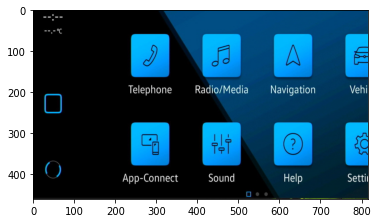

In [5]:
test_image = cv2.imread(file_path[3], cv2.IMREAD_COLOR)
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plt.imshow(test_image)


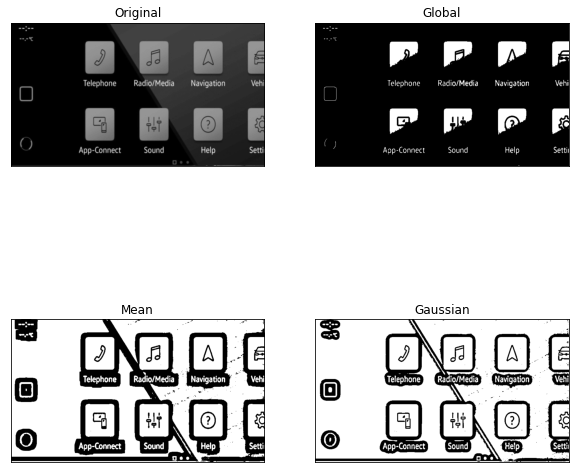

In [6]:
timage = cv2.imread(file_path[3], cv2.IMREAD_GRAYSCALE)
timage = cv2.GaussianBlur(timage, (3,3), 0)
ret, th1 = cv2.threshold(timage, 127, 255, 0)
th2 = cv2.adaptiveThreshold(timage, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 31, 2)
th3 = cv2.adaptiveThreshold(timage, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 2)
contours, _ = cv2.findContours(th2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

titles = ['Original','Global','Mean','Gaussian']

images = [timage,th1,th2,th3]

plt.rcParams['figure.figsize'] = [10, 10]
for i in range(4):
	plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
	plt.title(titles[i])
	plt.xticks([]),plt.yticks([])
    
plt.show()
    



In [7]:
# timage = cv2.imread(file_path[0], cv2.IMREAD_GRAYSCALE)
# ret, timage_binary = cv2.threshold(timage, 80, 255, 0)
# contours, _ = cv2.findContours(timage_binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# temp_image = test_image.copy()
# for cnt in contours:
#     cv2.drawContours(temp_image, [cnt], 0, (255, 0, 0), 3)
    
# plt.imshow(temp_image)


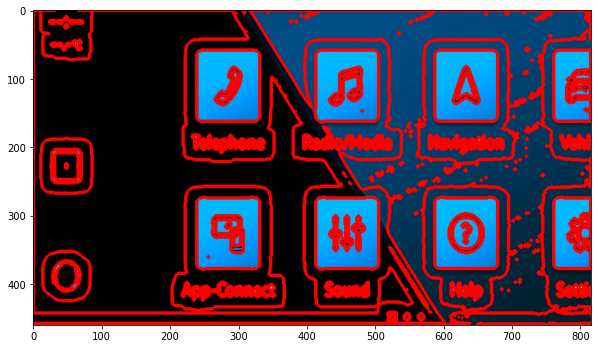

In [7]:
contours, _ = cv2.findContours(th2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

temp_image = test_image.copy()
for cnt in contours:
    cv2.drawContours(temp_image, [cnt], 0, (255, 0, 0), 3)

plt.imshow(temp_image)


In [8]:
def draw_rect(img, pts):
    (x, y, w, h) = cv2.boundingRect(pts)
    pt1 = (x, y)
    pt2 = (x+w, y+h)
    cv2.rectangle(img, pt1, pt2, (255, 0, 0), 3)

#### 여기서, 주어진 테두리 중에 원하는 사이즈만 걸러내야 될 것 같은데, 임의의 수 말고 
#### 알고리즘 같은 걸로 풀고 싶은데 그 방법을 고민해봐야함.

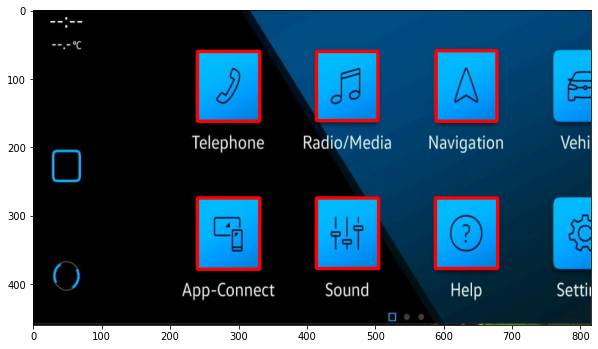

In [9]:
temp_image = test_image.copy()

possible_rects = []
for cnt in contours:
#     approx = cv2.approxPolyDP(cnt, cv2.arcLength(cnt, True) * 0.02, True)
    approx = cv2.approxPolyDP(cnt, 8, True)
    vtc = len(approx)
    
#     if vtc == 4:
#         possible_rects.append(approx)
    if vtc == 4 and cv2.contourArea(cnt) > 9000:
        draw_rect(temp_image, approx)
        possible_rects.append(approx)
#         print(approx)
    
plt.imshow(temp_image)

In [10]:
test = np.array(possible_rects)

In [11]:
print(test.shape)


(6, 4, 1, 2)


In [12]:
print(test[0])

[[[417 274]]

 [[414 374]]

 [[502 376]]

 [[504 277]]]


In [13]:
rect_boxes = []
for targets in test:
    # coords is corresspond of [x0, y0, x1, y1]
    coords = np.hstack([np.squeeze(targets[0]), np.squeeze(targets[2])])
    rect_boxes.append(coords)
    

In [14]:
np.array(rect_boxes).shape

(6, 4)

In [15]:
print(folder_path)

/home001/yousung.choi/projects/project_coordination/tools/temp_test/jpg/


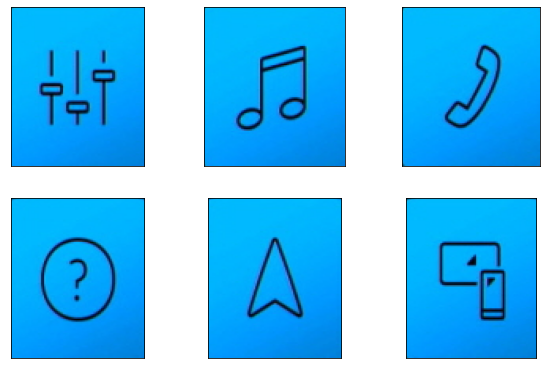

In [16]:
temp_image = test_image.copy()

images = []
for boxes in rect_boxes:
    pt1 = (boxes[0], boxes[1])
    pt2 = (boxes[2], boxes[3])
#     temp_image = cv2.rectangle(temp_image, pt1, pt2, (0, 0, 255), 3)
    
    images.append(temp_image[boxes[1]:boxes[3], boxes[0]:boxes[2], :])


for i in range(6):
    plt.subplot(3,3,i+1),plt.imshow(images[i])
    cv2.imwrite(folder_path + 'my_Icon_' + str(i) + '.jpg', images[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()

In [19]:
for image in images:
    test_img = np.array(image)
    print(test_img.shape, test_img.max(), test_img.min())

(102, 85, 3) 255 0
(100, 88, 3) 255 0
(101, 87, 3) 255 0
(102, 85, 3) 255 0
(102, 85, 3) 255 0
(103, 84, 3) 255 0


In [20]:
Icon_files = []
for files in os.listdir(folder_path):
    if files.startswith('my_'):
        Icon_files.append(files)

0


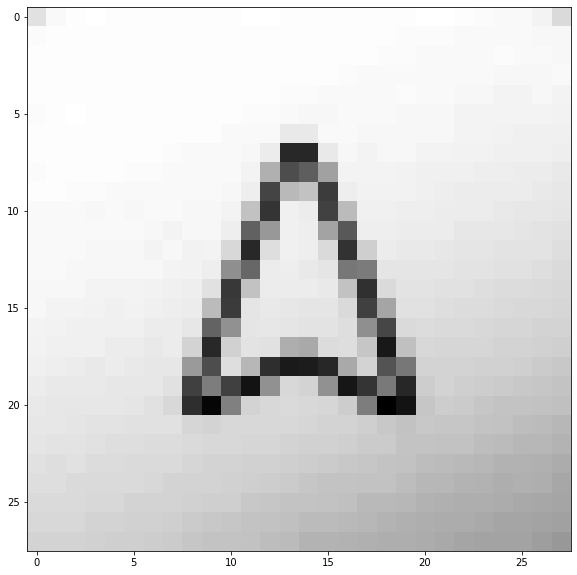

In [21]:
import random
idx = random.randint(0, len(Icon_files) - 1)
print(idx)
for i,files in enumerate(Icon_files):
    if i == idx:
        src = cv2.imread(folder_path + files, cv2.IMREAD_GRAYSCALE)
        dst = cv2.resize(src, dsize=(28, 28), interpolation=cv2.INTER_AREA)
        plt.imshow(dst, 'gray')
        break

#### 여기서 색상 반전을 해봐야 될 것인가 고민

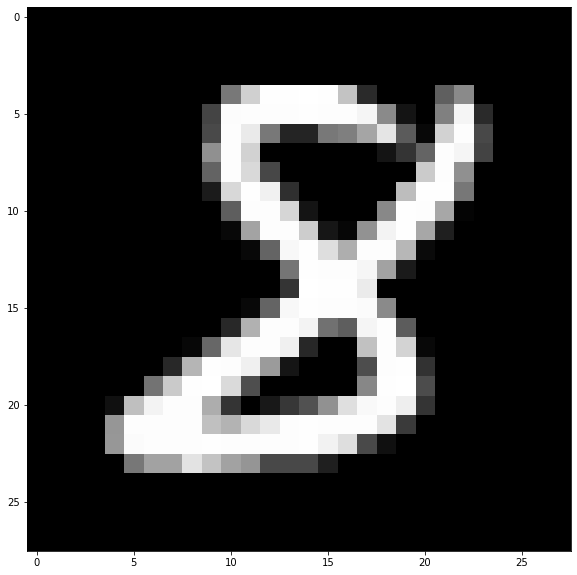

In [49]:
import random

plt.imshow(trainX[random.randint(0, 60000)], 'gray')

# ===================== 여기서부터 샴 네트워크 테스트
# https://www.pyimagesearch.com/2020/11/30/siamese-networks-with-keras-tensorflow-and-deep-learning/

## 1 ) Image pre-processing Test

In [22]:
# import the necessary packages
from tensorflow.keras.datasets import mnist
from imutils import build_montages
import numpy as np
import cv2

In [23]:
def make_pairs(images, labels):
	# initialize two empty lists to hold the (image, image) pairs and
	# labels to indicate if a pair is positive or negative
	pairImages = []
	pairLabels = []
    
    # calculate the total number of classes present in the dataset
	# and then build a list of indexes for each class label that
	# provides the indexes for all examples with a given label
	numClasses = len(np.unique(labels))
	idx = [np.where(labels == i)[0] for i in range(0, numClasses)]
    
    
    	# loop over all images
	for idxA in range(len(images)):
		# grab the current image and label belonging to the current
		# iteration
		currentImage = images[idxA]
		label = labels[idxA]
		# randomly pick an image that belongs to the *same* class
		# label
		idxB = np.random.choice(idx[label])
		posImage = images[idxB]
		# prepare a positive pair and update the images and labels
		# lists, respectively
		pairImages.append([currentImage, posImage])
		pairLabels.append([1])
        
        # grab the indices for each of the class labels *not* equal to
		# the current label and randomly pick an image corresponding
		# to a label *not* equal to the current label
		negIdx = np.where(labels != label)[0]
		negImage = images[np.random.choice(negIdx)]
		# prepare a negative pair of images and update our lists
		pairImages.append([currentImage, negImage])
		pairLabels.append([0])
	# return a 2-tuple of our image pairs and labels
	return (np.array(pairImages), np.array(pairLabels))


In [24]:
# load MNIST dataset and scale the pixel values to the range of [0, 1]
print("[INFO] loading MNIST dataset...")
(trainX, trainY), (testX, testY) = mnist.load_data()
# build the positive and negative image pairs
print("[INFO] preparing positive and negative pairs...")
(pairTrain, labelTrain) = make_pairs(trainX, trainY)
(pairTest, labelTest) = make_pairs(testX, testY)
# initialize the list of images that will be used when building our
# montage
images = []

[INFO] loading MNIST dataset...
[INFO] preparing positive and negative pairs...


In [25]:
# loop over a sample of our training pairs
for i in np.random.choice(np.arange(0, len(pairTrain)), size=(49,)):
	# grab the current image pair and label
	imageA = pairTrain[i][0]
	imageB = pairTrain[i][1]
	label = labelTrain[i]
	# to make it easier to visualize the pairs and their positive or
	# negative annotations, we're going to "pad" the pair with four
	# pixels along the top, bottom, and right borders, respectively
	output = np.zeros((36, 60), dtype="uint8")
	pair = np.hstack([imageA, imageB])
	output[4:32, 0:56] = pair
	# set the text label for the pair along with what color we are
	# going to draw the pair in (green for a "positive" pair and
	# red for a "negative" pair)
	text = "neg" if label[0] == 0 else "pos"
	color = (0, 0, 255) if label[0] == 0 else (0, 255, 0)
	# create a 3-channel RGB image from the grayscale pair, resize
	# it from 60x36 to 96x51 (so we can better see it), and then
	# draw what type of pair it is on the image
	vis = cv2.merge([output] * 3)
	vis = cv2.resize(vis, (96, 51), interpolation=cv2.INTER_LINEAR)
	cv2.putText(vis, text, (2, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.75,
		color, 2)
	# add the pair visualization to our list of output images
	images.append(vis)

(357, 672, 3)


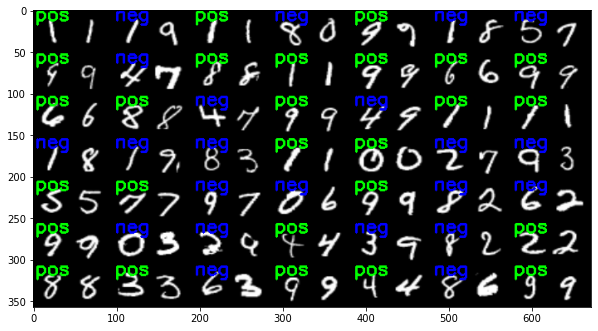

In [42]:
# construct the montage for the images
montage = build_montages(images, (96, 51), (7, 7))[0]
# show the output montage

print(montage.shape)
plt.imshow(montage)


## 2 ) real network

In [26]:
# import the necessary packages
import os
# specify the shape of the inputs for our network
IMG_SHAPE = (28, 28, 1)
# specify the batch size and number of epochs
BATCH_SIZE = 64
EPOCHS = 100

In [27]:
!pwd

/home001/yousung.choi/projects/project_coordination


In [28]:
# define the path to the base output directory
BASE_OUTPUT = "/home001/yousung.choi/projects/project_coordination/siamese"
# use the base output path to derive the path to the serialized
# model along with training history plot
MODEL_PATH = os.path.sep.join([BASE_OUTPUT, "siamese_model"])
PLOT_PATH = os.path.sep.join([BASE_OUTPUT, "plot.png"])
print("MODEL_PATH : ", MODEL_PATH)
print("PLOT_PATH : ", PLOT_PATH)

MODEL_PATH :  /home001/yousung.choi/projects/project_coordination/siamese/siamese_model
PLOT_PATH :  /home001/yousung.choi/projects/project_coordination/siamese/plot.png


In [29]:
# import the necessary packages
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import MaxPooling2D

In [30]:
def build_siamese_model(inputShape, embeddingDim=48):
	# specify the inputs for the feature extractor network
	inputs = Input(inputShape)
	# define the first set of CONV => RELU => POOL => DROPOUT layers
	x = Conv2D(64, (2, 2), padding="same", activation="relu")(inputs)
	x = MaxPooling2D(pool_size=(2, 2))(x)
	x = Dropout(0.3)(x)
	# second set of CONV => RELU => POOL => DROPOUT layers
	x = Conv2D(64, (2, 2), padding="same", activation="relu")(x)
	x = MaxPooling2D(pool_size=2)(x)
	x = Dropout(0.3)(x)
    
    # prepare the final outputs
	pooledOutput = GlobalAveragePooling2D()(x)
	outputs = Dense(embeddingDim)(pooledOutput)
	# build the model
	model = Model(inputs, outputs)
    
	# return the model to the calling function
	return model

In [29]:
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt
import numpy as np

In [30]:
def euclidean_distance(vectors):
	# unpack the vectors into separate lists
	(featsA, featsB) = vectors
	# compute the sum of squared distances between the vectors
	sumSquared = K.sum(K.square(featsA - featsB), axis=1,
		keepdims=True)
	# return the euclidean distance between the vectors
	return K.sqrt(K.maximum(sumSquared, K.epsilon()))

In [31]:
def plot_training(H, plotPath):
	# construct a plot that plots and saves the training history
	plt.style.use("ggplot")
	plt.figure()
	plt.plot(H.history["loss"], label="train_loss")
	plt.plot(H.history["val_loss"], label="val_loss")
	plt.plot(H.history["accuracy"], label="train_acc")
	plt.plot(H.history["val_accuracy"], label="val_acc")
	plt.title("Training Loss and Accuracy")
	plt.xlabel("Epoch #")
	plt.ylabel("Loss/Accuracy")
	plt.legend(loc="lower left")
	plt.savefig(plotPath)

In [32]:
# import the necessary packages
# from pyimagesearch.siamese_network import build_siamese_model
# from pyimagesearch import config
# from pyimagesearch import utils
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Lambda
from tensorflow.keras.datasets import mnist
import numpy as np

In [31]:
# load MNIST dataset and scale the pixel values to the range of [0, 1]
print("[INFO] loading MNIST dataset...")
(trainX, trainY), (testX, testY) = mnist.load_data()
trainX = trainX / 255.0
testX = testX / 255.0
# add a channel dimension to the images
trainX = np.expand_dims(trainX, axis=-1)
testX = np.expand_dims(testX, axis=-1)
# prepare the positive and negative pairs
print("[INFO] preparing positive and negative pairs...")
(pairTrain, labelTrain) = make_pairs(trainX, trainY)
(pairTest, labelTest) = make_pairs(testX, testY)

[INFO] loading MNIST dataset...
[INFO] preparing positive and negative pairs...


In [32]:
print(trainX.shape)
print(pairTrain.shape, labelTrain.shape)
print(pairTest.shape, labelTest.shape)

(60000, 28, 28, 1)
(120000, 2, 28, 28, 1) (120000, 1)
(20000, 2, 28, 28, 1) (20000, 1)


In [35]:
# configure the siamese network
print("[INFO] building siamese network...")
imgA = Input(shape=IMG_SHAPE)
imgB = Input(shape=IMG_SHAPE)
featureExtractor = build_siamese_model(IMG_SHAPE)
featsA = featureExtractor(imgA)
featsB = featureExtractor(imgB)

[INFO] building siamese network...


In [36]:
featureExtractor.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        16448     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0     

In [85]:
# finally, construct the siamese network
distance = Lambda(euclidean_distance)([featsA, featsB])
outputs = Dense(1, activation="sigmoid")(distance)
model = Model(inputs=[imgA, imgB], outputs=outputs)

In [90]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
model (Functional)              (None, 48)           19888       input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 1)            0           model[0][0]                

In [87]:
# compile the model
print("[INFO] compiling model...")
model.compile(loss="binary_crossentropy", optimizer="adam",
	metrics=["accuracy"])
# train the model
print("[INFO] training model...")
history = model.fit(
	[pairTrain[:, 0], pairTrain[:, 1]], labelTrain[:],
	validation_data=([pairTest[:, 0], pairTest[:, 1]], labelTest[:]),
	batch_size=BATCH_SIZE, 
	epochs=EPOCHS)

[INFO] compiling model...
[INFO] training model...
Epoch 1/100
1633/1875 [=========================>....] - ETA: 43s - loss: 0.6933 - accuracy: 0.5015

KeyboardInterrupt: 

In [ ]:
# serialize the model to disk
print("[INFO] saving siamese model...")
model.save(config.MODEL_PATH)
# plot the training history
print("[INFO] plotting training history...")
utils.plot_training(history, config.PLOT_PATH)

In [33]:
import tensorflow as tf
import os
import numpy as np

PATH = "/home001/yousung.choi/projects/project_coordination/siamese/siamese_model"
loaded = tf.saved_model.load(PATH)

In [34]:
loaded.signatures.keys()

KeysView(_SignatureMap({'serving_default': <ConcreteFunction signature_wrapper(*, input_2, input_1) at 0x7F0B383651D0>}))

In [35]:
infer = loaded.signatures['serving_default']

In [36]:
print(infer.structured_outputs)
print(infer.structured_input_signature)

{'dense_1': TensorSpec(shape=(None, 1), dtype=tf.float32, name='dense_1')}
((), {'input_2': TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='input_2'), 'input_1': TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='input_1')})


In [37]:
print(infer.outputs)
print(infer.inputs)

[<tf.Tensor 'Identity:0' shape=(None, 1) dtype=float32>]
[<tf.Tensor 'input_1:0' shape=(None, 28, 28, 1) dtype=float32>, <tf.Tensor 'input_2:0' shape=(None, 28, 28, 1) dtype=float32>, <tf.Tensor 'unknown:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_0:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_1:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_2:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_3:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_4:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_5:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_6:0' shape=<unknown> dtype=resource>]


In [38]:
print(pairTest[0].shape)

input1 = np.expand_dims(pairTest[2][0], 0)
input2 = np.expand_dims(pairTest[2][1], 0)

print(input1.shape, input1.dtype, input2.shape, input2.dtype)

(2, 28, 28, 1)
(1, 28, 28, 1) float64 (1, 28, 28, 1) float64


In [39]:
test = [input1, input2]
print(np.array(test).shape)

(2, 1, 28, 28, 1)


In [40]:
# model.predict([input1, input2])


In [41]:
infer(input_1 = input1.astype('float32'), input_2 = input2.astype('float32'))

{'dense_1': <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.9637476]], dtype=float32)>}

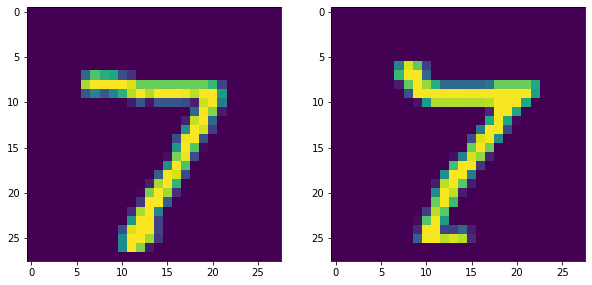

In [112]:
plt.subplot(121)
plt.imshow(pairTest[0][0])
plt.subplot(122)
plt.imshow(pairTest[0][1])


#### 그렇다면 음...
# 일단 임시 이미지를 여기에 넣어볼까 ? ㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎ

5 6
6


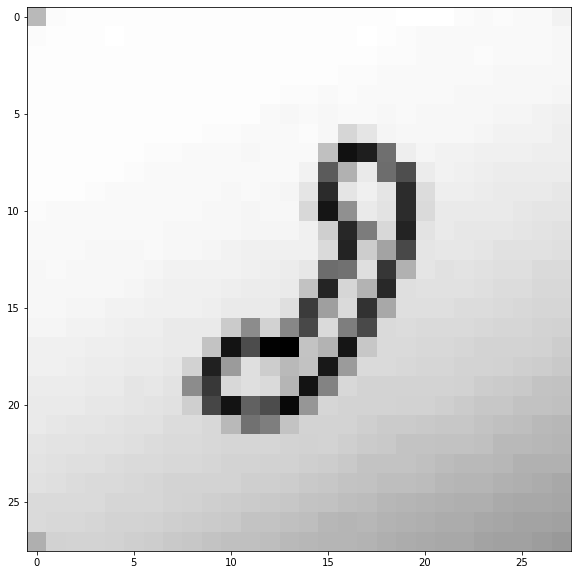

In [42]:
import random
idx = random.randint(0, len(Icon_files) - 1)
print(idx, len(Icon_files))
Icon_images = []
for i,files in enumerate(Icon_files):
    src = cv2.imread(folder_path + files, cv2.IMREAD_GRAYSCALE)
    dst = cv2.resize(src, dsize=(28, 28), interpolation=cv2.INTER_AREA)
    Icon_images.append(np.expand_dims(dst, -1))
    if i == idx:
        plt.imshow(dst, 'gray')
#         break
print(len(Icon_images))

(28, 28, 1) (28, 28, 1)


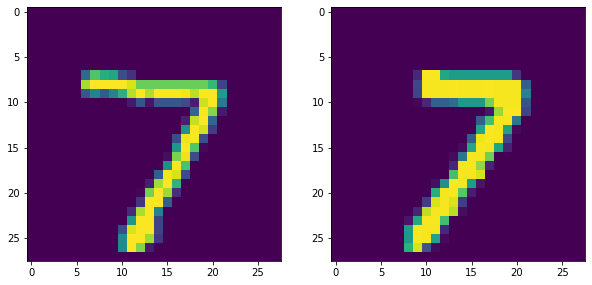

In [75]:
print(pairTest[0][0].shape, pairTest[0][1].shape)
plt.subplot(121)
plt.imshow(pairTest[0][0])
plt.subplot(122)
plt.imshow(pairTest[0][1])

In [ ]:
# import random
# idx = random.randint(0, len(Icon_files) - 1)
# print(idx)
# for i,files in enumerate(Icon_files):
#     if i == idx:
#         src = cv2.imread(folder_path + files, cv2.IMREAD_GRAYSCALE)
#         dst = cv2.resize(src, dsize=(28, 28), interpolation=cv2.INTER_AREA)
#         plt.imshow(dst, 'gray')
#         break

In [43]:
print(len(Icon_images), Icon_images[0].shape)
print(Icon_images[0].max(), Icon_images[0].min())

6 (28, 28, 1)
186 70


In [45]:
# input1 = np.expand_dims(Icon_images[0], 0)
# input2 = np.expand_dims(Icon_images[0], 0)

# print(input1.shape, input1.dtype, input2.shape, input2.dtype)

# infer(input_1 = input1.astype('float32'), input_2 = input2.astype('float32'))

for val in range(6):
    Icon_images[val] = Icon_images[val] / 255.0
    input1 = np.expand_dims(Icon_images[val], 0)
    input2 = np.expand_dims(Icon_images[(val+1 )%6], 0)

#     print(input1.shape, input1.dtype, input2.shape, input2.dtype)

    print(infer(input_1 = input1.astype('float32'), input_2 = input2.astype('float32')))


{'dense_1': <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[1.0892372e-06]], dtype=float32)>}
{'dense_1': <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[2.455964e-06]], dtype=float32)>}
{'dense_1': <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[1.8151608e-06]], dtype=float32)>}
{'dense_1': <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[2.4236408e-06]], dtype=float32)>}
{'dense_1': <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[5.229221e-06]], dtype=float32)>}
{'dense_1': <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.9985851]], dtype=float32)>}


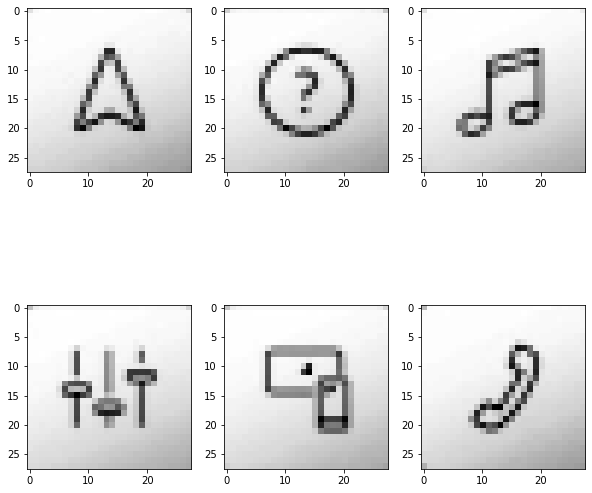

In [55]:
plt.subplot(231)
plt.imshow(Icon_images[0], 'gray')
plt.subplot(232)
plt.imshow(Icon_images[1], 'gray')
plt.subplot(233)
plt.imshow(Icon_images[2], 'gray')
plt.subplot(234)
plt.imshow(Icon_images[3], 'gray')
plt.subplot(235)
plt.imshow(Icon_images[4], 'gray')
plt.subplot(236)
plt.imshow(Icon_images[5], 'gray')